## Gaussian Process Regression
### 1. Introduction
### 2. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF 
from sklearn.model_selection import train_test_split

In [2]:
# pandas will automatically convert the 'NaN' values to np.nan
red_ball_coordinates = pd.read_csv('data/red_ball_coordinates_128px_017.csv', delimiter=',')
red_ball_coordinates

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,NaN,NaN,NaN,NaN,NaN,NaN,52.880000,83.240000,NaN,NaN,59.0,69.5,68.666667,118.333333
1,NaN,NaN,NaN,NaN,NaN,NaN,51.041667,83.125000,NaN,NaN,NaN,NaN,68.428571,118.571429
2,NaN,NaN,NaN,NaN,125.882353,91.411765,49.833333,82.333333,NaN,NaN,NaN,NaN,68.428571,118.571429
3,NaN,NaN,NaN,NaN,124.647059,89.617647,47.416667,81.916667,NaN,NaN,NaN,NaN,68.428571,118.571429
4,40.500000,127.500000,84.500000,127.500000,123.673913,88.739130,45.909091,81.787879,NaN,NaN,NaN,NaN,68.428571,118.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,82.675000,113.975000,12.000000,72.000000,55.000000,23.750000,84.764706,66.970588,NaN,NaN,60.5,69.0,68.500000,119.500000
1869,81.043478,116.130435,12.000000,72.000000,55.000000,23.750000,82.909091,68.666667,NaN,NaN,60.5,69.0,68.500000,119.500000
1870,77.923077,119.846154,120.285714,123.333333,55.000000,23.750000,79.690476,71.452381,NaN,NaN,60.5,69.0,68.500000,119.500000
1871,79.543478,118.347826,113.777778,118.666667,55.000000,23.750000,81.096774,70.322581,NaN,NaN,60.5,69.0,68.500000,119.500000


In [3]:
xyz_coordinates = pd.read_csv('data/positions_xyz_128px_017.csv', delimiter=',')
xyz_coordinates

,x,y,z
0,6.000000,4.000000,14.00000
1,6.000000,7.000000,14.00000
2,6.000000,7.000000,14.00000
3,6.000000,7.000000,14.00000
4,6.169909,6.993336,14.07999
...,...,...,...
1872,3.642321,5.456923,12.76173
1873,3.751164,5.628386,12.83502
1874,3.867227,5.792615,12.90916
1875,3.990135,5.948880,12.98405


In [4]:
# remove the first rows of xyz_coordinates
xyz_coordinates = xyz_coordinates.iloc[4:]
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
xyz_coordinates

,x,y,z
0,6.169909,6.993336,14.07999
1,6.339272,6.973373,14.15992
2,6.507547,6.940200,14.23974
3,6.674192,6.893964,14.31939
4,6.838673,6.834871,14.39882
...,...,...,...
1868,3.642321,5.456923,12.76173
1869,3.751164,5.628386,12.83502
1870,3.867227,5.792615,12.90916
1871,3.990135,5.948880,12.98405


In [5]:
combined_data = []
# combine the two dataframes
if red_ball_coordinates.shape[0] == xyz_coordinates.shape[0]:
    combined_data = pd.concat([red_ball_coordinates, xyz_coordinates], axis=1)
combined_data

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,52.880000,83.240000,NaN,NaN,59.0,69.5,68.666667,118.333333,6.169909,6.993336,14.07999
1,NaN,NaN,NaN,NaN,NaN,NaN,51.041667,83.125000,NaN,NaN,NaN,NaN,68.428571,118.571429,6.339272,6.973373,14.15992
2,NaN,NaN,NaN,NaN,125.882353,91.411765,49.833333,82.333333,NaN,NaN,NaN,NaN,68.428571,118.571429,6.507547,6.940200,14.23974
3,NaN,NaN,NaN,NaN,124.647059,89.617647,47.416667,81.916667,NaN,NaN,NaN,NaN,68.428571,118.571429,6.674192,6.893964,14.31939
4,40.500000,127.500000,84.500000,127.500000,123.673913,88.739130,45.909091,81.787879,NaN,NaN,NaN,NaN,68.428571,118.571429,6.838673,6.834871,14.39882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,82.675000,113.975000,12.000000,72.000000,55.000000,23.750000,84.764706,66.970588,NaN,NaN,60.5,69.0,68.500000,119.500000,3.642321,5.456923,12.76173
1869,81.043478,116.130435,12.000000,72.000000,55.000000,23.750000,82.909091,68.666667,NaN,NaN,60.5,69.0,68.500000,119.500000,3.751164,5.628386,12.83502
1870,77.923077,119.846154,120.285714,123.333333,55.000000,23.750000,79.690476,71.452381,NaN,NaN,60.5,69.0,68.500000,119.500000,3.867227,5.792615,12.90916
1871,79.543478,118.347826,113.777778,118.666667,55.000000,23.750000,81.096774,70.322581,NaN,NaN,60.5,69.0,68.500000,119.500000,3.990135,5.948880,12.98405


### 3. Data Preprocessing

In [6]:
# split into features and target
X = combined_data.iloc[:, :14]
y = combined_data.iloc[:, 14:]

In [7]:
from sklearn.impute import SimpleImputer
# scale the features and the target
from sklearn.preprocessing import StandardScaler

#### 3.1. Impute the NaN values with mean SimpleImputer

In [8]:
imputer = SimpleImputer(strategy='mean')
X_imputed_mean = imputer.fit_transform(X)
y_imputed_mean = imputer.fit_transform(y)

#### 3.2. Impute the NaN values with median SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='median')
X_imputed_median = imputer.fit_transform(X)
y_imputed_median = imputer.fit_transform(y)

### 3.3. Impute the NaN values with KNNImputer

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputed_knn = imputer.fit_transform(X)
y_imputed_knn = imputer.fit_transform(y)

### 4. Gaussian Process Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_knn, y_imputed_knn, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

In [12]:
X_scaled_train = scaler_X.fit_transform(X_train)
y_scaled_train = scaler_y.fit_transform(y_train)

gp.fit(X_scaled_train, y_scaled_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=20)

### 5. Predictions

In [13]:
X_test_scaled = scaler_X.transform(X_test)
y_pred, sigma = gp.predict(X_test_scaled, return_std=True)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[ 7.72803613,  6.04234223, 16.36904059],
       [ 3.14767283,  3.5685738 , 15.7160084 ],
       [ 8.52278354,  1.30030768, 16.65906245],
       ...,
       [ 6.82593557,  5.59597023, 15.44442257],
       [ 3.36705952,  6.91725105, 11.08672615],
       [ 6.35245942,  4.01912543, 14.34151878]])

### 6. Conclusion
#### Visualize the results

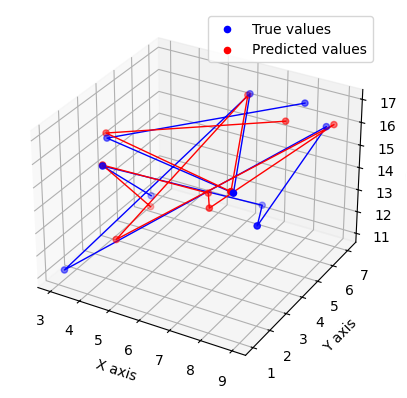

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
amount_to_show = 10
# Scatter plot for true values
ax.scatter3D(y_test[:amount_to_show, 0], y_test[:amount_to_show, 1], 
             y_test[:amount_to_show, 2], color='blue', label='True values')

# Connect the points with lines according to time
ax.plot(y_test[:amount_to_show, 0], y_test[:amount_to_show, 1], 
        y_test[:amount_to_show, 2], color='blue', linestyle='-', linewidth=1)
ax.scatter3D(y_pred[:amount_to_show, 0], y_pred[:amount_to_show, 1], 
             y_pred[:amount_to_show, 2], color='red', label='Predicted values')

# Connect the points with lines according to time
ax.plot(y_pred[:amount_to_show, 0], y_pred[:amount_to_show, 1], 
        y_pred[:amount_to_show, 2], color='red', linestyle='-', linewidth=1)

# Customize labels and legend
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# set each axis from 0, 20
#ax.set_xlim(0, 20)
#ax.set_ylim(0, 20)
#ax.set_zlim(0, 20)
ax.legend()

# Show the plot
plt.show()

In [15]:
import matplotlib.pyplot as plt

# Assuming y_pred has three columns (x, y, z)
y_pred_x, y_pred_y, y_pred_z = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
sigma_x, sigma_y, sigma_z = sigma[:, 0], sigma[:, 1], sigma[:, 2]
y_test_x, y_test_y, y_test_z = y_test[:, 0], y_test[:, 1], y_test[:, 2]

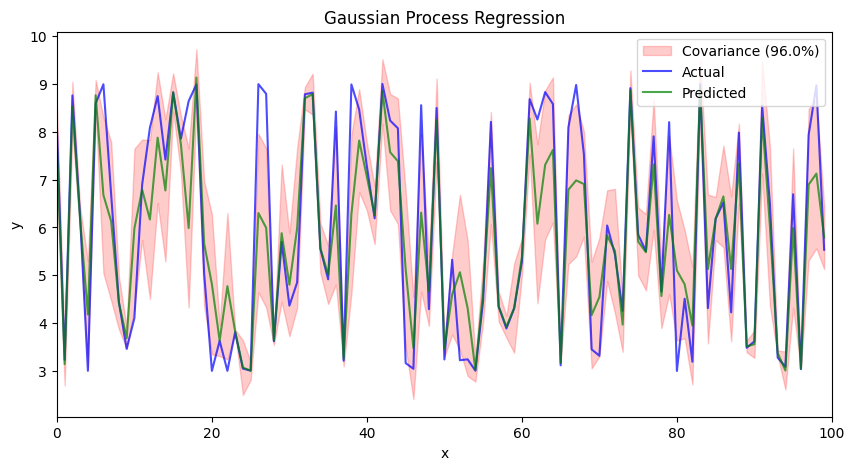

In [16]:
from plot_maker import gaussian_process_plot
# for the x dimension
gaussian_process_plot(y_test_x[:100], y_pred_x[:100], sigma_x[:100])

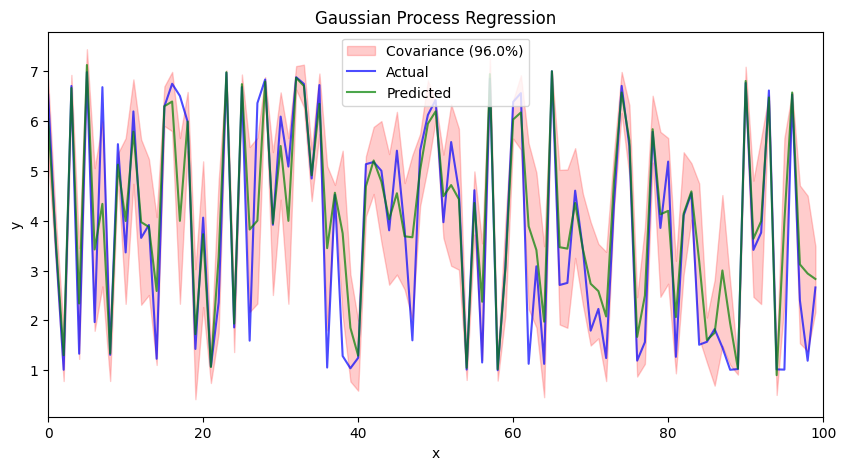

In [17]:
# for the y dimension
gaussian_process_plot(y_test_y[:100], y_pred_y[:100], sigma_y[:100])

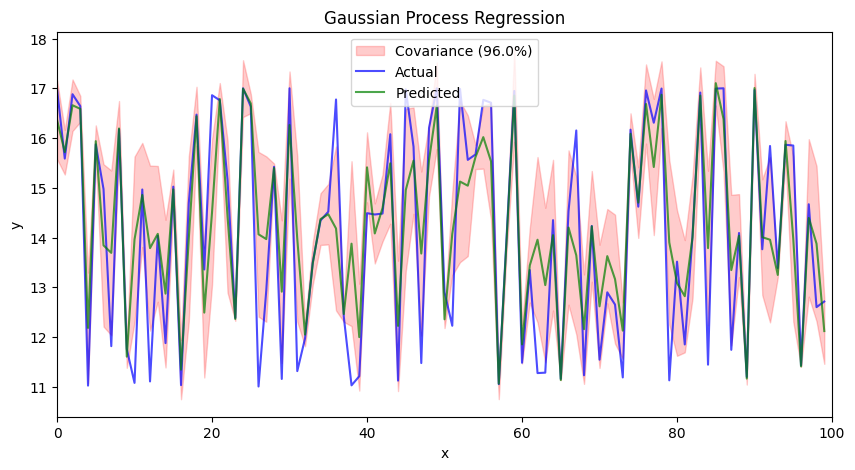

In [18]:
# for the z dimension
gaussian_process_plot(y_test_z[:100], y_pred_z[:100], sigma_z[:100])